In [2]:
import pandas as pd
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")


In [17]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [18]:
print(customers.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [19]:
print(customers.shape)


(200, 4)


In [11]:
print(products.describe())


            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [12]:
print(products.shape)


(100, 4)


In [13]:
print(products.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [20]:
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [21]:
print(transactions.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [23]:
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [25]:
print(transactions.shape)

(1000, 7)


In [27]:
print(transactions.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [28]:
print(customers.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [29]:
print(products.isnull().sum())


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [30]:
print(transactions.isnull().sum())


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [31]:
transactions = transactions.drop_duplicates()


In [32]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [33]:
print(products['Category'].mode())


0          Books
1    Electronics
Name: Category, dtype: object


In [34]:
print(customers['Region'].mode())


0    South America
Name: Region, dtype: object


In [36]:
#Top 10 products that contributes to revenue
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)


In [37]:
top_products = top_products.reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID')


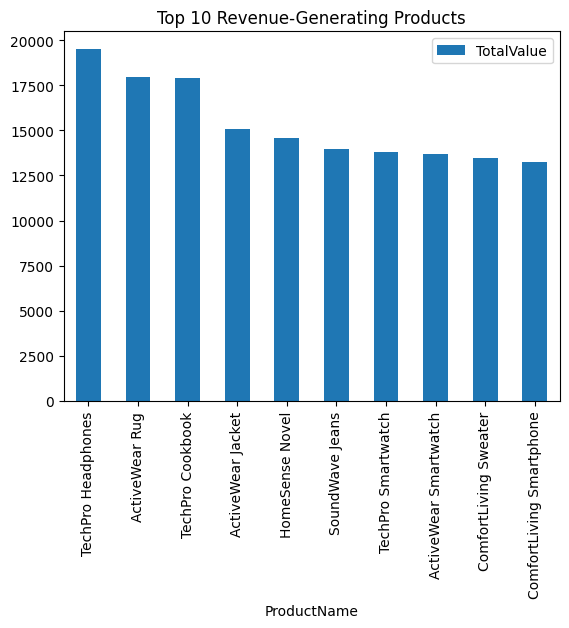

In [38]:
import matplotlib.pyplot as plt
top_products.plot(kind='bar', x='ProductName', y='TotalValue', title='Top 10 Revenue-Generating Products')
plt.show()


In [39]:
#Aggregate transactions by month
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()


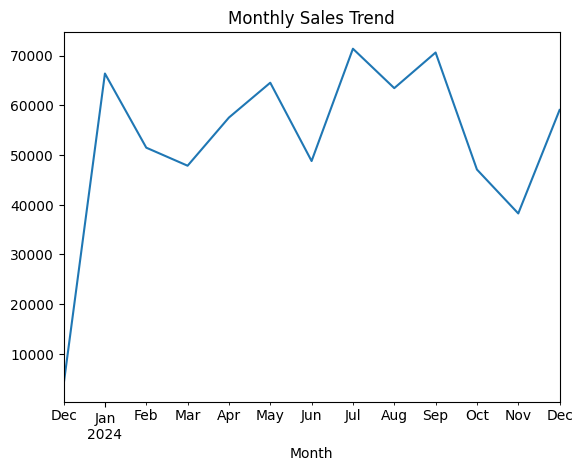

In [40]:
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.show()


In [41]:
#Calculate correlations between numerical columns
correlation_matrix = transactions[['Quantity', 'Price', 'TotalValue']].corr()


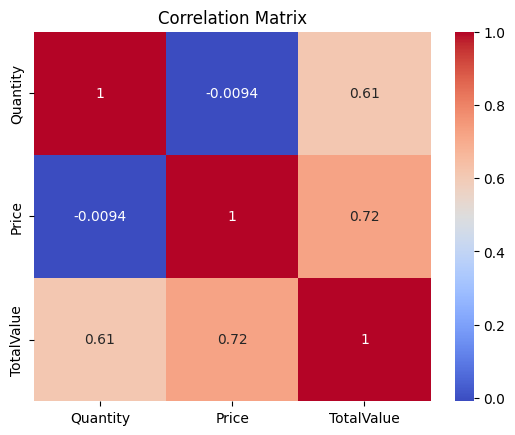

In [42]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [44]:
#combining  transactions with customers on CustomerID
transactions_customers = transactions.merge(customers, on='CustomerID')


In [45]:
#now further combining the above result with products on ProductID
full_data = transactions_customers.merge(products, on='ProductID')


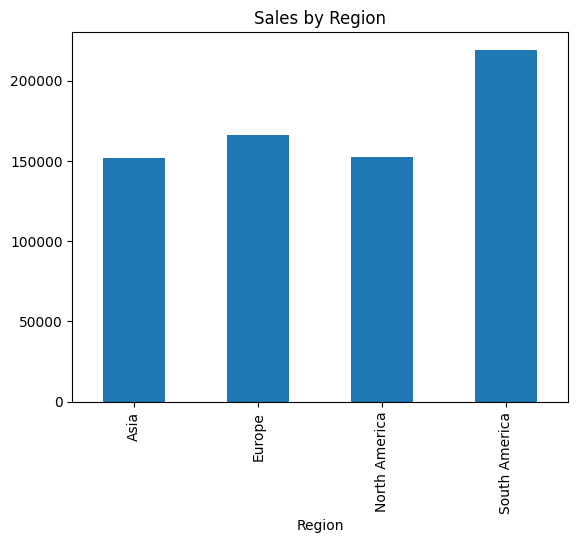

In [47]:
#Sales by Region
region_sales = full_data.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title='Sales by Region')
plt.show()


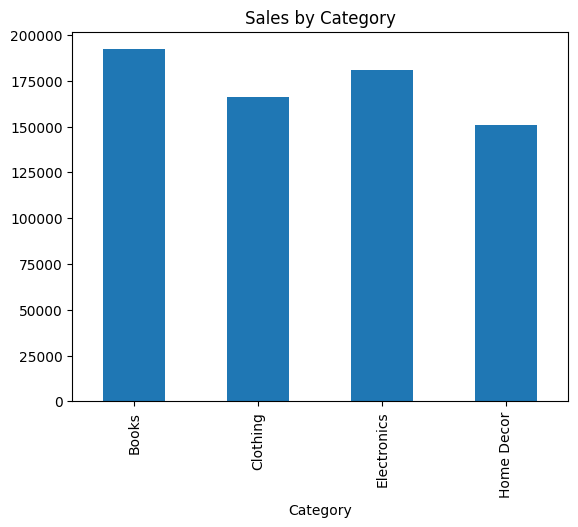

In [48]:
#Sales by Category
category_sales = full_data.groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='bar', title='Sales by Category')
plt.show()

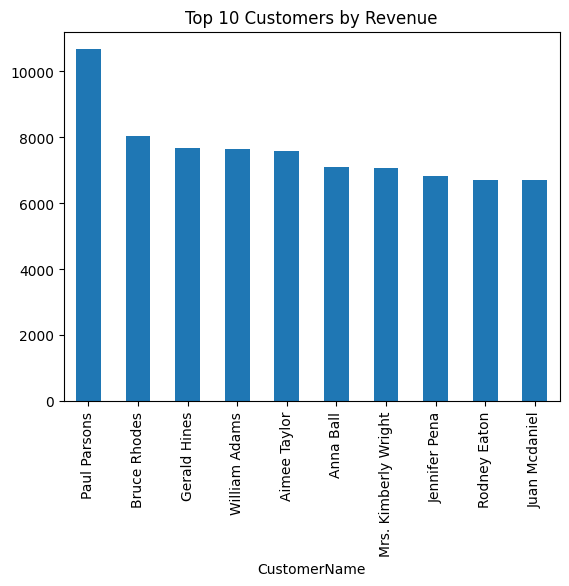

In [50]:
#Top 10 Customers contributing in Revenue
top_customers = full_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Revenue')
plt.show()
